In [4]:
import tensorflow as tf

# import the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('tmp/data', one_hot=True)

# hyperparameters
learning_rate = 0.0005
training_iterations = 5000
batch_size= 120
img_height = 28
img_width = 28
n_input = img_height*img_width 
n_class = 10 
display_step = 100 #To visualize some training step


# MODEL
## Define the input for the model
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_class])
drop = tf.placeholder(tf.float32)

## Define the different layers
## We'll do so by using two functions
def conv2d (x, W, b, stride=1):
    x = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2 (x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k , 1], padding='SAME')

## Getting the model : same process : we'll go through a function to make it easier to read
def CNN (x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, img_height, img_width, 1])
    
    conv1 = conv2d (x, weights['c1'], biases['c1'], stride=1)
    max1 = maxpool2 (conv1, k=2)
    
    conv2 = conv2d (max1, weights['c2'], biases['c2'], stride=1)
    max2 = maxpool2 (conv2, k=2)
    
    # Reshape maxv2 output to fit fully connected layer input
    flatten = tf.reshape(max2, [-1, weights['f1'].get_shape().as_list()[0]])    
    fc1 = tf.add(tf.matmul(flatten, weights['f1']), biases['f1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    
    # Output wich can go through softmax
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# define the starting weights and biases that'll be use and update by CNN
weights = {
    'c1' : tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'c2' : tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'f1' : tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, n_class]))
}

biases = {
    'c1' : tf.Variable(tf.random_normal([32])),
    'c2' : tf.Variable(tf.random_normal([64])),
    'f1' : tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_class]))
}


# prediction from model CNN
pred = CNN (x, weights, biases, drop)

# evaluation
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))
train = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# evaluate 
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# init variables
init = tf.global_variables_initializer()

#launch the session : 
losses = []
accurate = []
with tf.Session() as sess:
    
    sess = tf.Session()
    sess.run(init)
    
    # Keep training until end of iterations by sending small batch of 128
    for step in range(training_iterations) :
        train_batch_x, train_batch_y = mnist.train.next_batch(batch_size)
        # Run optimizations op (backprop)
        sess.run(train, feed_dict={x:train_batch_x, y: train_batch_y, drop: .95})
        acc, loss = sess.run([accuracy, cost], feed_dict={x:train_batch_x, y: train_batch_y, drop: 1.})
        losses.append(loss)
        accurate.append(acc)
        if step%display_step == 0 :
            print("Iteration ", str(step),"... Loss= ", loss, "... Training Accuracy= ", acc)
        step += 1
    print("Training Finished !!!")
        
# Calculate the accuracy of the model
    print("Testing Accuracy ", \
          sess.run(accuracy, feed_dict={x:mnist.test.images, 
                                        y: mnist.test.labels, 
                                        drop: 1.}))

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz
Iteration  0 ... Loss=  53777.1 ... Training Accuracy=  0.0916667
Iteration  100 ... Loss=  3830.51 ... Training Accuracy=  0.716667
Iteration  200 ... Loss=  2030.18 ... Training Accuracy=  0.858333
Iteration  300 ... Loss=  1292.58 ... Training Accuracy=  0.858333
Iteration  400 ... Loss=  1153.97 ... Training Accuracy=  0.891667
Iteration  500 ... Loss=  971.84 ... Training Accuracy=  0.958333
Iteration  600 ... Loss=  720.999 ... Training Accuracy=  0.908333
Iteration  700 ... Loss=  464.186 ... Training Accuracy=  0.966667
Iteration  800 ... Loss=  1129.08 ... Training Accuracy=  0.925
Iteration  900 ... Loss=  567.453 ... Training Accuracy=  0.933333
Iteration  1000 ... Loss=  412.698 ... Training Accuracy=  0.966667
Iteration  1100 ... Loss=  457.101 ... Training Accuracy=  0.95
Iteration  1200 .

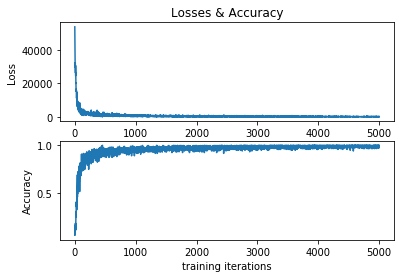

In [37]:
import numpy as np
import matplotlib.pyplot as plt # to plot
%matplotlib inline

losses = np.array(losses)
accurate = np.array(accurate)


plt.subplot(2, 1, 1)
plt.plot(losses)
plt.title('Losses & Accuracy')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(accurate)
plt.ylabel('Accuracy')
plt.xlabel('training iterations')

plt.show()
